In [21]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

Remember: 500 solar masses is the mass per particle

# THIS PART WORKS WITH NO_RT

In [22]:
전data290_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")
dx290_noRT = 전data290_noRT[:,4]
dy290_noRT = 전data290_noRT[:,5]
dz290_noRT = 전data290_noRT[:,6]
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11333.935323605565 pc, closest to 11340
rad_array290_noRT = np.arange(10, 11340, 10, dtype=np.int64) # unit: pc
density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof290_noRT = density_profile290_noRT / density_profile290_noRT[1]

In [23]:
mass_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
h = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile290_noRT[h] = how_many_particles * 500
    h += 1

## testing NFW profiles with different masses. the one called "halo6" will be the one running.

In [24]:
# the mass equals to the mass of the last data point that Jeon collected.

halo6_1 = NFW(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6_1 = halo6_1.r_s()
c_vir6_1 = halo6_1.c_vir()
print('r_s =', r_s6_1)
print('c_vir =', c_vir6_1)

radius6_1 = np.arange(0.01, 11.34, 0.01) #unit: kpc

r_s = 0.9768300377488506
c_vir = 18.041947430034675


In [25]:
# the mass is made up by Dr Besla to estimate m_vir

halo6 = NFW(2.85e8) # NFW using M_200 / 0.87
r_s6 = halo6.r_s()
c_vir6 = halo6.c_vir()
print('r_s =', r_s6)
print('c_vir =', c_vir6)

radius6 = np.arange(0.01, 11.34, 0.01) #unit: kpc

r_s = 0.9404201093284129
c_vir = 18.16826652958019


## plotting the best fit, unnormalized

In [26]:
'''this is to set in stone some of the variables we'll use later'''

dx290_noRT = 전data290_noRT[:,4] / 1000 # converting pc to kpc
dy290_noRT = 전data290_noRT[:,5] / 1000 # converting pc to kpc
dz290_noRT = 전data290_noRT[:,6] / 1000 # converting pc to kpc
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11.333935323605565 pc, closest to 11.340 pc
rad_array290_noRT = np.arange(0.01, 11.34, 0.01) # unit: kpc

density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1

# this finds density that best corresponds to the critical density
rho_crit = 161.7
deviation_from_rho_crit = abs(density_profile290_noRT * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array290_noRT[index][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate = abs(density_profile290_noRT * 500 - density200)
ind = np.where(deviate == min(deviate))
radi = rad_array290_noRT[ind][0]
mass_at_200_times_rho_crit = mass_profile290_noRT[ind][0] 

# this defines the NFW profile
density_profile6 = halo6.rho(radius6)
density_profile6_1 = halo6_1.rho(radius6_1)

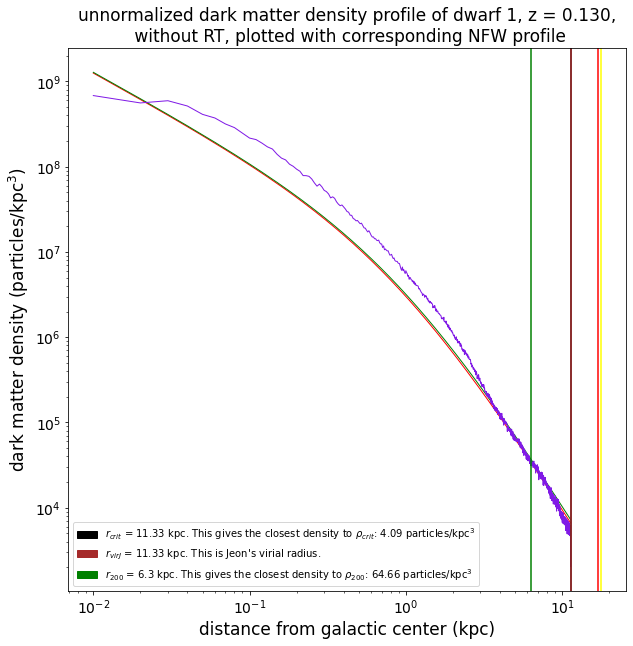

In [27]:
# this just makes it more convenient to annotate the graph
rad_1 = "$r_{crit}$ = " + str(rad_at_rho_crit) + " kpc. This gives the closest density to $ρ_{crit}$: " + \
str(round(density_profile290_noRT[index][0], 2)) + " particles/kpc$^3$" 
# multiply the density here by 500 to make the horizontal & vertical lines intersect!
rad_2 = "$r_{virJ}$ = " + str(round(1.133394e+04 * 0.001, 2)) + " kpc. This is Jeon's virial radius."
rad_3 = "$r_{200}$ = " + str(radi) + " kpc. This gives the closest density to $ρ_{200}$: " + \
str(round(density_profile290_noRT[ind][0], 2)) + " particles/kpc$^3$"

# the rest is the actual graphing stuff
plt.figure(figsize=(10, 10))
plt.plot(radius6, density_profile6, color='red', linewidth=1)
plt.plot(radius6_1, density_profile6_1, color='green', linewidth=1)
plt.plot(radius6, density_profile290_noRT * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axvline(rad_at_rho_crit, color='black')
plt.axvline(1.133394e+04 * 0.001, color='brown')
plt.axvline(radi, color='green')
plt.axvline(halo6_1.r_vir(), color='yellow')
plt.axvline(halo6.r_vir(), color='red')
legend1 = mpatches.Patch(color='black', label=rad_1)
legend2 = mpatches.Patch(color='brown', label=rad_2)
legend3 = mpatches.Patch(color='green', label=rad_3)
plt.legend(handles=[legend1, legend2, legend3], loc='lower left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

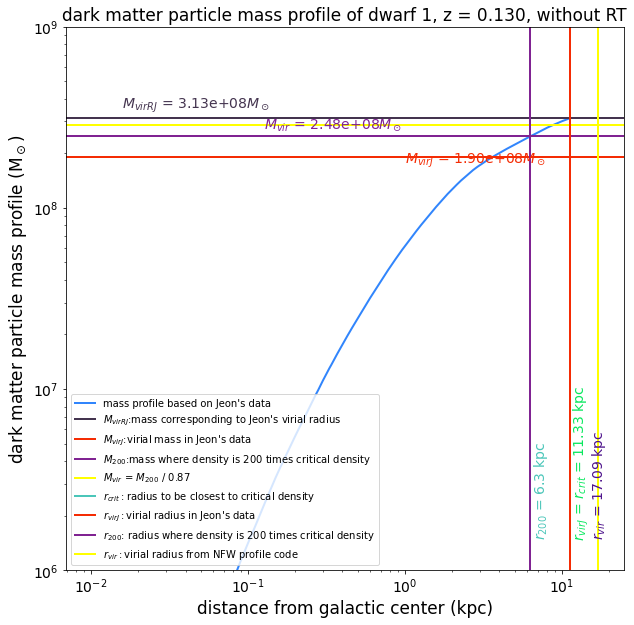

In [28]:
# plotting the mass profile at this redshift

plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(radius6, mass_profile290_noRT, color='#3185FC', linewidth=2, \
        label="mass profile based on Jeon's data")

# all the horizontal lines
plt.axhline(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1], color='#44344F', linewidth=2, \
           label="$M_{virRJ}$:mass corresponding to Jeon's virial radius")
plt.axhline(1.903021e+08, color='#F42C04', linewidth=2, \
           label="$M_{virJ}$:virial mass in Jeon's data")
plt.axhline(mass_at_200_times_rho_crit, color='#802392', linewidth=2, \
           label="$M_{200}$:mass where density is 200 times critical density")
plt.axhline(mass_at_200_times_rho_crit / 0.87, color='yellow', linewidth=2, \
            label="$M_{vir}$ = $M_{200}$ / 0.87")

# all the vertical lines
plt.axvline(rad_at_rho_crit, color='#4BC6B9', linewidth=2, \
           label="$r_{crit}:$radius to be closest to critical density")
plt.axvline(1.133394e+04 * 0.001, color='#F42C04', linewidth=2, \
           label="$r_{virJ}:$virial radius in Jeon's data")
plt.axvline(radi, color='#802392', linewidth=2, \
           label="$r_{200}$: radius where density is 200 times critical density")
plt.axvline(halo6.r_vir(), color='yellow', linewidth=2, \
           label="$r_{vir}:$virial radius from NFW profile code")

plt.legend(loc='lower left')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(1e6, 1e9)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.text(10**-1.8, 10**8.55, '''$M_{virRJ}$ = ''' + str(format(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#44344F')
plt.text(10**0, 10**8.25, '''$M_{virJ}$ = ''' + str(format(1.903021e+08, '.2e')) +  '''$M_\odot$''', \
         fontsize=14, color='#F42C04')
plt.text(10**-0.9, 10**8.44, '''$M_{vir}$ = ''' + str(format(mass_at_200_times_rho_crit, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#802392')
plt.text(10**0.807, 10**6.2, '''$r_{200}$ = ''' + str(round(radi, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#4BC6B9')
plt.text(10**1.061, 10**6.2, '''$r_{virJ}$ = $r_{crit}$ = ''' + str(round(1.133394e+04 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#09E85E')
plt.text(10**1.182, 10**6.2, '''$r_{vir}$ = ''' + str(round(halo6.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#4E148C')


plt.show()

# THIS PART WORKS WITH RT

In [29]:
전data290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0290.txt")
dx290 = 전data290[:,4]
dy290 = 전data290[:,5]
dz290 = 전data290[:,6]
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11415.825965662318, closest to 11420
rad_array290 = np.arange(10, 11420, 10, dtype=np.int64)
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
densityprof290 = density_profile290 / density_profile290[1]

In [30]:
mass_profile290 = np.zeros(np.size(rad_array290))
h = 0
for radius_value in rad_array290:
    particles = np.where((r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile290[h] = how_many_particles * 500
    h += 1

In [31]:
# pick a halo mass, change the concentration

halo7 = NFW(mass_profile290[np.size(mass_profile290) - 1])
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 11.42, 0.01) #unit: kpc

r_s = 0.9853784583446804
c_vir = 18.01309676379171


In [32]:
mass_profile290 = np.zeros(np.size(rad_array290))
h = 0
for radius_value in rad_array290:
    particles = np.where((r290 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    mass_profile290[h] = how_many_particles * 500
    h += 1

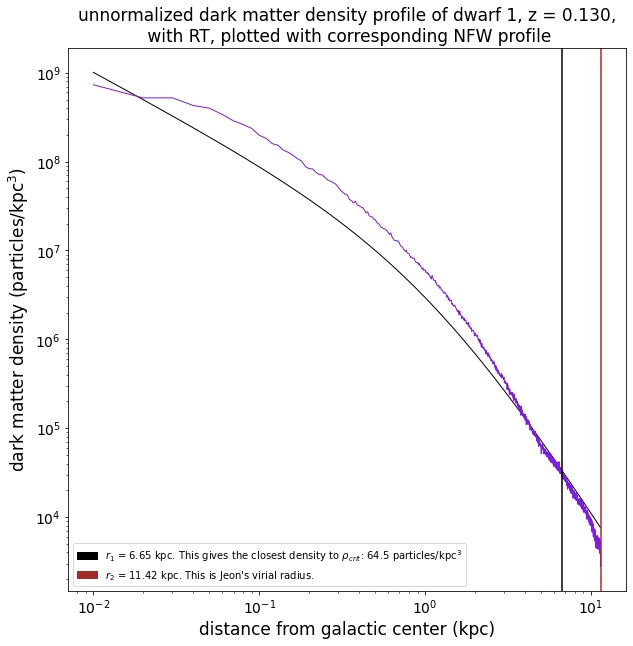

In [33]:
# plotting the best fit, UNNORMALIZED

dx290 = 전data290[:,4] / 1000 # converting data in pc to kpc
dy290 = 전data290[:,5] / 1000 # converting data in pc to kpc
dz290 = 전data290[:,6] / 1000 # converting data in pc to kpc
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11.415825965662318 kpc, closest to 11.42 kpc
rad_array290 = np.arange(0.01, 11.42, 0.01) # bin size: 0.01 kpc
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1

rho_crit = 200 * 161.7
deviation_from_rho_crit = abs(density_profile290 * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
radius_at_rho_crit = rad_array290[index][0]

rad_1 = "$r_1$ = " + str(radius_at_rho_crit) + " kpc. This gives the closest density to $ρ_{crit}$: " + \
str(round(density_profile290[index][0], 2)) + " particles/kpc$^3$"
# multiply the density here by 500 to make the horizontal & vertical lines intersect!
rad_2 = "$r_2$ = " + str(round(1.141584e+04 * 0.001, 2)) + " kpc. This is Jeon's virial radius."

density_profile6 = halo7.rho(radius7)

plt.figure(figsize=(10, 10))

plt.plot(radius7, density_profile7, color='black', linewidth=1)
plt.plot(radius7, density_profile290 * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axvline(radius_at_rho_crit, color='black') 
plt.axvline(1.141584e+04 * 0.001, color='brown')
legend1 = mpatches.Patch(color='black', label=rad_1)
legend2 = mpatches.Patch(color='brown', label=rad_2)

plt.legend(handles=[legend1, legend2], loc='lower left')
        
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

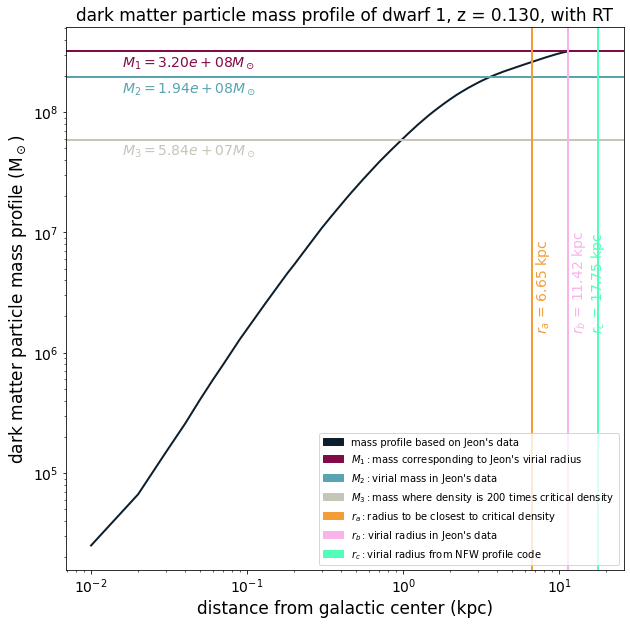

In [34]:
# plotting the mass profile at this redshift

new_density = rho_crit * 200
deviate = abs(density_profile290 * 500 - new_density)
ind = np.where(deviate == min(deviate))
mass_at_200_times_rho_crit = mass_profile290[ind][0] 

plt.figure(figsize=(10,10))

plt.plot(radius7, mass_profile290, color='#0D1F2D', linewidth=2)
plt.axhline(mass_profile290[np.size(mass_profile290) - 1], color='#830A48', linewidth=2)
plt.axhline(1.944113e+08, color='#58A4B0', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit, color='#C6C5B9', linewidth=2) #something's wrong with this
plt.axvline(radius_at_rho_crit, color='#F49D37', linewidth=2)
plt.axvline(1.141584e+04 * 0.001, color='#FAB2EA', linewidth=2)
plt.axvline(halo7.r_vir(), color='#52FFB8', linewidth=2)
legend1 = mpatches.Patch(color='#0D1F2D', label="mass profile based on Jeon's data")
legend2 = mpatches.Patch(color='#830A48', label="$M_1:$mass corresponding to Jeon's virial radius")
legend3 = mpatches.Patch(color='#58A4B0', label="$M_2:$virial mass in Jeon's data")
legend3a = mpatches.Patch(color='#C6C5B9', label="$M_3:$mass where density is 200 times critical density")
legend4 = mpatches.Patch(color='#F49D37', label="$r_a:$radius to be closest to critical density")
legend5 = mpatches.Patch(color='#FAB2EA', label="$r_b:$virial radius in Jeon's data")
legend6 = mpatches.Patch(color='#52FFB8', label="$r_c:$virial radius from NFW profile code")

plt.legend(handles=[legend1, legend2, legend3, legend3a, legend4, legend5, legend6], loc='lower right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.text(10**-1.8, 10**8.38, '''$M_1 = ''' + str(format(mass_profile290[np.size(mass_profile290) - 1], '.2e')) + \
         '''M_\odot$''', fontsize=14, color='#830A48')
plt.text(10**-1.8, 10**8.17, '''$M_2 = ''' + str(format(1.944113e+08, '.2e')) + '''M_\odot$''', \
         fontsize=14, color='#58A4B0')
plt.text(10**-1.8, 10**7.65, '''$M_3 = ''' + str(format(mass_at_200_times_rho_crit, '.2e')) + \
         '''M_\odot$''',fontsize=14, color='#C6C5B9')
plt.text(10**0.835, 10**6.2, '''$r_a$ = ''' + str(round(radius_at_rho_crit, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F49D37')
plt.text(10**1.066, 10**6.2, '''$r_b$ = ''' + str(round(1.141584e+04 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#FAB2EA')
plt.text(10**1.19, 10**6.2, '''$r_c$ = ''' + str(round(halo7.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#52FFB8')

plt.show()